In [1]:
import pickle

# https://github.com/RaRe-Technologies/gensim
import gensim
from gensim.models import CoherenceModel, LdaModel, LsiModel, HdpModel
from gensim.corpora import Dictionary

# https://github.com/bmabey/pyLDAvis
import pyLDAvis.gensim

import warnings
warnings.filterwarnings('ignore')

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

import math

In [2]:
TOKEN_NO_BELLOW_FREQ   = 30
TOKEN_NO_ABOVE_PERCENT = 0.3

In [3]:
with (open("tokens.pickle", "rb")) as openfile:
    texts = pickle.load(openfile)

In [4]:
len(texts)

124740

In [5]:
bigram = gensim.models.Phrases(texts)

In [6]:
texts = [bigram[line] for line in texts]

In [11]:
texts[10]

['million',
 'spectateur',
 'accus',
 'million',
 'préférer',
 'petit',
 'plaisir',
 'bourgeois',
 'soir',
 'protection_enfance',
 'femme']

In [12]:
# Create a dictionary representation of the documents.
dictionary = Dictionary(texts)

# Filter out words that occur less than TOKEN_NO_BELLOW_FREQ documents, 
# or more than TOKEN_NO_ABOVE_PERCENT% of the documents.
dictionary.filter_extremes(no_below=TOKEN_NO_BELLOW_FREQ, no_above=TOKEN_NO_ABOVE_PERCENT)

In [13]:
# Bag-of-words representation of the documents.
corpus = [dictionary.doc2bow(text) for text in texts]

In [14]:
print('Number of unique tokens: %d' % len(dictionary))
print('Number of documents: %d' % len(corpus))

Number of unique tokens: 5439
Number of documents: 124740


In [30]:
# Set training parameters.
chunksize = 500
passes = 20
iterations = 100
eval_every = 1  # Don't evaluate model perplexity, takes too much time.

# Make a index to word dictionary.
temp = dictionary[0]  # This is only to "load" the dictionary.
id2word = dictionary.id2token

for nb_topics in range(6,10):
    ldamodel = LdaModel(corpus=corpus, id2word=id2word, chunksize=chunksize, \
                           alpha='auto', eta='auto', \
                           iterations=iterations, num_topics=nb, \
                           passes=passes, eval_every=eval_every)
    p = pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary)
    pyLDAvis.save_html(p, 'graphs/save_{}_LDA.html'.format(nb_topics))
    print('Topic done n°{}'.format(nb_topics))

Topic done n°6


KeyboardInterrupt: 

In [27]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model=LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

ValueError: x and y must have same first dimension, but have shapes (7,) and (5,)

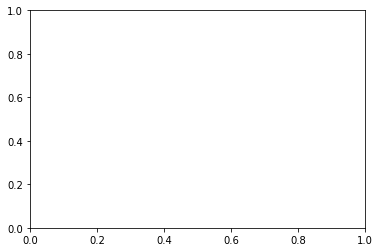

In [28]:
model_list, coherence_values = compute_coherence_values(
    dictionary=dictionary, corpus=corpus, texts=texts, start=2, limit=12, step=2)

Text(0.5, 0, 'Num Topics')

Text(0, 0.5, 'Coherence score')

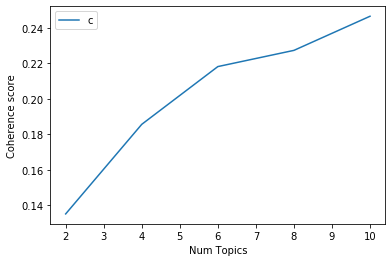

In [29]:
# Show graph
import matplotlib.pyplot as plt
limit=12; start=2; step=2;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [20]:
import matplotlib.pyplot as plt
for t in range(tweets_lda.num_topics):
    plt.figure()
    plt.imshow(WordCloud().fit_words(lda.show_topic(t, 200)))
    plt.axis("off")
    plt.title("Topic #" + str(t))
    plt.show()

<Figure size 432x288 with 0 Axes>

NameError: name 'WordCloud' is not defined

<Figure size 432x288 with 0 Axes>

In [ ]:
texts_cloud.map()

In [ ]:
k = 5
tweets_lda = LdaModel(corpus, num_topics = k, id2word = id2word, passes=10)

def plot_top_words(lda=tweets_lda, nb_topics=k, nb_words=10):
    top_words = [[word for word,_ in lda.show_topic(topic_id, topn=50)] for topic_id in range(lda.num_topics)]
    top_betas = [[beta for _,beta in lda.show_topic(topic_id, topn=50)] for topic_id in range(lda.num_topics)]

    gs  = gridspec.GridSpec(round(math.sqrt(k))+1,round(math.sqrt(k))+1)
    gs.update(wspace=0.5, hspace=0.5)
    plt.figure(figsize=(20,15))
    for i in range(nb_topics):
        ax = plt.subplot(gs[i])
        plt.barh(range(nb_words), top_betas[i][:nb_words], align='center',color='blue', ecolor='black')
        ax.invert_yaxis()
        ax.set_yticks(range(nb_words))
        ax.set_yticklabels(top_words[i][:nb_words])
        plt.title("Topic "+str(i))

In [ ]:
plot_top_words()

In [18]:
k = 4
tweets_lda = LdaModel(corpus, num_topics = k, id2word = id2word, passes=passes)

def plot_top_words(lda=tweets_lda, nb_topics=k, nb_words=10):
    top_words = [[word for word,_ in lda.show_topic(topic_id, topn=50)] for topic_id in range(lda.num_topics)]
    top_betas = [[beta for _,beta in lda.show_topic(topic_id, topn=50)] for topic_id in range(lda.num_topics)]

    gs  = gridspec.GridSpec(round(math.sqrt(k))+1,round(math.sqrt(k))+1)
    gs.update(wspace=0.5, hspace=0.5)
    plt.figure(figsize=(20,15))
    for i in range(nb_topics):
        ax = plt.subplot(gs[i])
        plt.barh(range(nb_words), top_betas[i][:nb_words], align='center',color='blue', ecolor='black')
        ax.invert_yaxis()
        ax.set_yticks(range(nb_words))
        ax.set_yticklabels(top_words[i][:nb_words])
        plt.title("Topic "+str(i))
plot_top_words()